In [1]:
%matplotlib inline
import numpy
from matplotlib import pyplot

# Learning from Data of Variable Quality

- Authors: Koby Crammer, Michael Kearns, Jennifer Wortman
- This Jupyter Notebook made by Miquel Perelló Nieto

## Estimating the Bias from Corrupted Coins

We should know the epsilon lower and upper bounds of each bias, and these should be sorted from smaller (or equal) to bigger.

[0.501 0.49  0.52  0.47  0.46  0.7   0.2   0.   ]


([array([6., 0., 0., 0., 0., 0., 0., 0., 0., 4.]),
  array([24.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 26.]),
  array([37.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 63.]),
  array([264.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 236.]),
  array([825.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 675.]),
  array([ 607.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1393.]),
  array([2400.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          600.]),
  array([10000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.])],
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 8 Lists of Patches objects>)

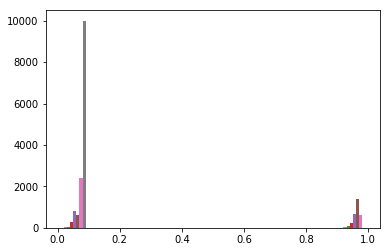

In [2]:
from numpy.random import choice

epsilon = numpy.array([0.01, 0.1, 0.4, 0.5])
n_outcomes = numpy.array([50, 100, 500, 600])
# Example from paper
epsilon = numpy.array([0.001, 0.01, 0.02, 0.03, 0.04, 0.2, 0.3, 0.5])
n_outcomes = numpy.array([10, 50, 100, 500, 1500, 2000, 3000, 10000])
bias = numpy.array([0.5 + e*choice([-1,1]) for e in epsilon])
print(bias)
K = len(bias)
samples = [numpy.random.binomial(1, bias[k], n_outcomes[k]) for k in range(K)]

pyplot.hist(samples)

In [3]:
print("Real bias is")
print(bias)
estimated_bias = [numpy.concatenate(samples[:(k+1)]).mean() for k in range(K)]
print("The estimated bias is")
print(estimated_bias)
expected_bias = [numpy.inner(bias[:(k+1)], n_outcomes[:(k+1)])/sum(n_outcomes[:(k+1)]) for k in range(K)]
print("The expected bias is")
print(expected_bias)

Real bias is
[0.501 0.49  0.52  0.47  0.46  0.7   0.2   0.   ]
The estimated bias is
[0.4, 0.5, 0.58125, 0.4984848484848485, 0.4648148148148148, 0.5762019230769231, 0.4185754189944134, 0.17465034965034965]
The expected bias is
[0.501, 0.4918333333333333, 0.5094375, 0.479560606060606, 0.46597685185185184, 0.5784879807692308, 0.41990363128491626, 0.17520454545454547]


### Real deviation

$$ | \beta - \hat\beta_k | $$

### Upper bound with triangle inequality and the authors' assumptions

$$
\begin{align}
| \beta - \hat\beta_k | =& | \beta - \bar\beta_k + \bar\beta_k - \hat\beta_k | \\
 \le& \sum_{i=1}^k \frac{n_i}{n_{i,k}}\epsilon_i + | \bar\beta_k - \hat\beta_k |
\end{align}
$$

Real deviation
[0.10099999999999998, 0.010000000000000009, 0.06125000000000003, 0.028484848484848502, 0.004814814814814772, 0.12379807692307687, 0.2185754189944134, 0.17465034965034965]
Upper bound of the deviation
[0.10099999999999998, 0.009166666666666712, 0.08114583333333339, 0.040757575757575784, 0.04572264309764311, 0.07462444153069156, 0.16982044228273285, 0.2947447498187722]


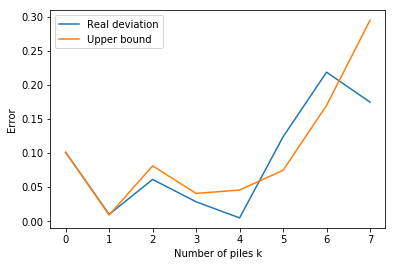

In [4]:
real_deviation = [abs(bias[k] - estimated_bias[k]) for k in range(K)]
print('Real deviation')
print(real_deviation)

upper_bound = []
for k in range(K):
    b = 0
    for i in range(k):
        b += (n_outcomes[i]/sum(n_outcomes[:(i+1)]))*epsilon[i]
    b += abs(expected_bias[k] - estimated_bias[k])
    upper_bound.append(b)
    
print('Upper bound of the deviation')
print(upper_bound)
# FIXME Shouldn't the upper bound be always bigger than its corresponding real_deviation?

pyplot.plot(real_deviation, label='Real deviation')
pyplot.plot(upper_bound, label='Upper bound')
pyplot.ylabel('Error')
pyplot.xlabel('Number of piles k')
pyplot.legend()

# <span style="color:red">FIXME The upper bound should be always bigger, but it is not the case here </span>

### Bounding the second term with Hoeffding inequality

With high probability and an appropiate choice of $\delta$

$$
| \beta - \hat\beta_k | \le \sum_{i=1}^k \frac{n_i}{n_{i,k}}\epsilon_i + \sqrt{\frac{\log(2K/\delta)}{2n_{1,k}}}
$$

Previous upperbound
[0.10099999999999998, 0.009166666666666712, 0.08114583333333339, 0.040757575757575784, 0.04572264309764311, 0.07462444153069156, 0.16982044228273285, 0.2947447498187722]
Upperbound with delta probability
[0.6957134468019832, 0.28502382530963133, 0.18326169503382914, 0.10746973879456012, 0.09189791027887795, 0.10644854192600123, 0.19449226222419047, 0.3109852348807587]


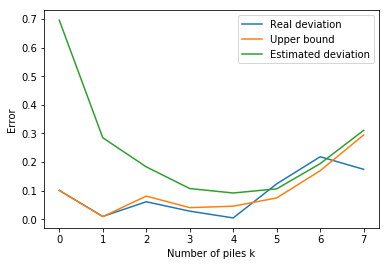

In [5]:
from numpy import sqrt, log

delta = 0.001
print('Previous upperbound')
print(upper_bound)
estimated_deviation = []
for k in range(K):
    b = 0
    for i in range(k):
        b += (n_outcomes[i]/sum(n_outcomes[:(i+1)]))*epsilon[i]
    b += sqrt(log(2.0*K/delta)/(2*sum(n_outcomes[:(k+1)])))
    estimated_deviation.append(b)
    
print('Upperbound with delta probability')
print(estimated_deviation)

pyplot.plot(real_deviation, label='Real deviation')
pyplot.plot(upper_bound, label='Upper bound')
pyplot.plot(estimated_deviation, label='Estimated deviation')
pyplot.ylabel('Error')
pyplot.xlabel('Number of piles k')
pyplot.legend()

# <span style="color:red">FIXME the papers' example do not show the delta value</span>

### Optimal number of piles

$$
k^* = \underset{k \in \{1, \dots, K\}}{\operatorname{argmin}} \left\{ \sum_{i=1}^k \frac{n_i}{n_{i,k}}\epsilon_i + \sqrt{\frac{\log(2K/\delta)}{2n_{1,k}}} \right\}
$$

In [6]:
k_star = numpy.argmin(estimated_deviation)
print('Optimum number of piles K* = {}'.format(k_star+1))

Optimum number of piles K* = 5
